### Goal: Implement all three ridge regression, lasso, and elastic net on the scaled data frame and compare.


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")

In [2]:
MM_df = pd.read_csv("../data/MaternalMortalityDF_scaled.csv")

In [3]:
MM_df

,State,Year,Maternal_Mortality_Rate,"$10,000 to $14,999","$100,000 to $149,999","$15,000 to $24,999","$150,000 to $199,999","$200,000 or more","$25,000 to $34,999","$35,000 to $49,999",...,UnknownInitialCare,NotReportedInitialCare,20-27Weeks,28-31Weeks,32-35Weeks,36Weeks,37-39Weeks,40Weeks,41Weeks,42PlusWeeks
0,Arizona,2011,17.535041,0.050941,0.120274,0.113698,0.039829,0.035108,0.109472,0.148437,...,0.000000,1.0,0.006383,0.007224,0.039992,0.039208,0.638813,0.211309,0.052395,0.003752
1,Arizona,2012,28.921461,0.049908,0.126118,0.108871,0.041107,0.036075,0.109403,0.148753,...,0.000000,1.0,0.005553,0.007959,0.040212,0.038061,0.641189,0.211300,0.051376,0.003135
2,Arizona,2013,26.869159,0.048638,0.124151,0.108188,0.044261,0.039363,0.107901,0.146377,...,0.000000,1.0,0.005105,0.007488,0.040070,0.037593,0.638633,0.211063,0.055923,0.003049
3,Arizona,2014,27.622084,0.048948,0.128419,0.100804,0.044806,0.044947,0.106101,0.144143,...,0.018725,0.0,0.005455,0.007642,0.039592,0.036899,0.637403,0.206245,0.062012,0.003338
4,Arizona,2015,23.432649,0.042673,0.131472,0.098472,0.050628,0.046791,0.103092,0.141929,...,0.019777,0.0,0.004874,0.007862,0.039707,0.037656,0.640590,0.203641,0.060890,0.003351
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
166,Washington,2015,12.360939,0.033038,0.169348,0.071090,0.071309,0.075715,0.081155,0.123342,...,0.048309,0.0,0.004989,0.007675,0.036903,0.031206,0.560850,0.241982,0.107529,0.007799
167,Washington,2016,13.258936,0.033063,0.177253,0.068122,0.077832,0.084730,0.073801,0.118044,...,0.048417,0.0,0.004044,0.007281,0.037125,0.032816,0.566996,0.237158,0.106160,0.007491
168,Washington,2017,27.409150,0.030409,0.184129,0.063782,0.084553,0.094392,0.069118,0.110217,...,0.058359,0.0,0.004123,0.006921,0.038122,0.034421,0.581097,0.226034,0.101482,0.006395
169,Washington,2018,24.394494,0.026178,0.186673,0.061550,0.092450,0.106915,0.065511,0.109749,...,0.077726,0.0,0.004728,0.006819,0.036975,0.034199,0.588976,0.224987,0.096068,0.005483


Aggrigate Income Data:

In [4]:
Agg_MM = True
if Agg_MM:
    MM_df['sub_75k_income'] = MM_df["Less than $10,000"]+ MM_df["$10,000 to $14,999"]+MM_df["$15,000 to $24,999"]+MM_df["$25,000 to $34,999"]+MM_df["$35,000 to $49,999"]+MM_df["$50,000 to $74,999"]
    MM_df['between_75k_150k_income'] = MM_df['$75,000 to $99,999']+MM_df["$100,000 to $149,999"]
    MM_df['above_150k_income'] = MM_df['$150,000 to $199,999']+MM_df['$200,000 or more']

In [9]:
from sklearn.metrics import mean_squared_error

There seem to be some values in the behavioral data that are showing up as NaN. So I will first remove those rows.

In [10]:
cleaned_MM_df = MM_df.dropna()

In [11]:
cleaned_MM_df

,State,Year,Maternal_Mortality_Rate,"$10,000 to $14,999","$100,000 to $149,999","$15,000 to $24,999","$150,000 to $199,999","$200,000 or more","$25,000 to $34,999","$35,000 to $49,999",...,28-31Weeks,32-35Weeks,36Weeks,37-39Weeks,40Weeks,41Weeks,42PlusWeeks,sub_75k_income,between_75k_150k_income,above_150k_income
0,Arizona,2011,17.535041,0.050941,0.120274,0.113698,0.039829,0.035108,0.109472,0.148437,...,0.007224,0.039992,0.039208,0.638813,0.211309,0.052395,0.003752,0.685861,0.240198,0.074937
1,Arizona,2012,28.921461,0.049908,0.126118,0.108871,0.041107,0.036075,0.109403,0.148753,...,0.007959,0.040212,0.038061,0.641189,0.211300,0.051376,0.003135,0.677035,0.245300,0.077182
2,Arizona,2013,26.869159,0.048638,0.124151,0.108188,0.044261,0.039363,0.107901,0.146377,...,0.007488,0.040070,0.037593,0.638633,0.211063,0.055923,0.003049,0.669731,0.246781,0.083624
3,Arizona,2014,27.622084,0.048948,0.128419,0.100804,0.044806,0.044947,0.106101,0.144143,...,0.007642,0.039592,0.036899,0.637403,0.206245,0.062012,0.003338,0.658680,0.251632,0.089753
4,Arizona,2015,23.432649,0.042673,0.131472,0.098472,0.050628,0.046791,0.103092,0.141929,...,0.007862,0.039707,0.037656,0.640590,0.203641,0.060890,0.003351,0.644614,0.257747,0.097419
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
166,Washington,2015,12.360939,0.033038,0.169348,0.071090,0.071309,0.075715,0.081155,0.123342,...,0.007675,0.036903,0.031206,0.560850,0.241982,0.107529,0.007799,0.540799,0.312515,0.147025
167,Washington,2016,13.258936,0.033063,0.177253,0.068122,0.077832,0.084730,0.073801,0.118044,...,0.007281,0.037125,0.032816,0.566996,0.237158,0.106160,0.007491,0.518502,0.318333,0.162562
168,Washington,2017,27.409150,0.030409,0.184129,0.063782,0.084553,0.094392,0.069118,0.110217,...,0.006921,0.038122,0.034421,0.581097,0.226034,0.101482,0.006395,0.495483,0.324429,0.178944
169,Washington,2018,24.394494,0.026178,0.186673,0.061550,0.092450,0.106915,0.065511,0.109749,...,0.006819,0.036975,0.034199,0.588976,0.224987,0.096068,0.005483,0.476336,0.324416,0.199364


### Let's perform all three regressions and compare using both the behavioral data and the aggregated income data.

In [15]:
x = cleaned_MM_df[['Percent_Overweight',	'Percent_Obese',	'Percent_Overweight_or_Obese',	'Percent_No_Activity', 'sub_75k_income',	'between_75k_150k_income',	'above_150k_income']]
y = cleaned_MM_df['Maternal_Mortality_Rate']

In [6]:
from sklearn.model_selection import train_test_split

In [16]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2, random_state=42)

In [19]:
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer, mean_squared_error

# Define models
ridge = Ridge(alpha=1.0)
lasso = Lasso(alpha=0.1)
elastic_net = ElasticNet(alpha=0.1, l1_ratio=0.5)

# Define scoring metric
scorer = make_scorer(mean_squared_error, greater_is_better=False)

# Perform cross-validation
ridge_scores = cross_val_score(ridge, xtrain, ytrain, cv=5, scoring=scorer)
lasso_scores = cross_val_score(lasso, xtrain, ytrain, cv=5, scoring=scorer)
elastic_net_scores = cross_val_score(elastic_net, xtrain, ytrain, cv=5, scoring=scorer)

# Compare results
print("Ridge Mean Squared Error:", -ridge_scores.mean())
print("Lasso Mean Squared Error:", -lasso_scores.mean())
print("ElasticNet Mean Squared Error:", -elastic_net_scores.mean())

Ridge Mean Squared Error: 122.47654483614164
Lasso Mean Squared Error: 122.13773727087587
ElasticNet Mean Squared Error: 122.08129263155502


Let's look at the R2 scores.

Ridge R² Score: 0.3929475278076622
Lasso R² Score: 0.3917038833283737
ElasticNet R² Score: 0.3917688344577267


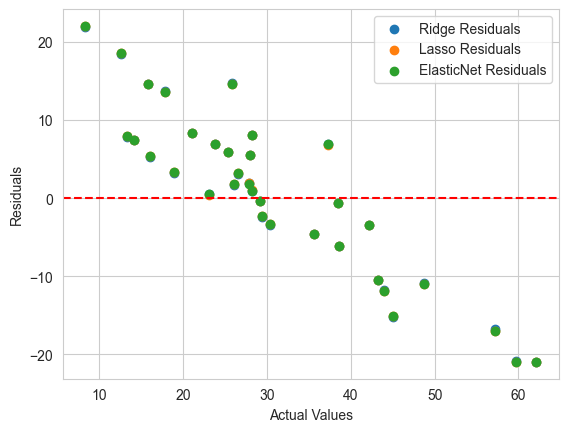

In [20]:
from sklearn.metrics import r2_score

ridge.fit(xtrain, ytrain)
lasso.fit(xtrain, ytrain)
elastic_net.fit(xtrain, ytrain)

print("Ridge R² Score:", r2_score(ytest, ridge.predict(xtest)))
print("Lasso R² Score:", r2_score(ytest, lasso.predict(xtest)))
print("ElasticNet R² Score:", r2_score(ytest, elastic_net.predict(xtest)))

plt.scatter(ytest, ridge.predict(xtest) - ytest, label="Ridge Residuals")
plt.scatter(ytest, lasso.predict(xtest) - ytest, label="Lasso Residuals")
plt.scatter(ytest, elastic_net.predict(xtest) - ytest, label="ElasticNet Residuals")
plt.axhline(0, color='red', linestyle='--')
plt.legend()
plt.xlabel("Actual Values")
plt.ylabel("Residuals")
plt.show()

Generally, an R-squared value of 0.70 or higher is considered good, indicating a large proportion of the variance in the dependent variable is explained by the independent variable.